In [2]:
import numpy as np

import astropy.units as u
from astropy.visualization import hist
from astropy.io import fits
from matplotlib import cm

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import LogNorm

from astropy.cosmology import WMAP9 as cosmo
from astropy.coordinates import Distance

%matplotlib inline

In [3]:
rcParams['figure.figsize'] = (12,8)
m2l = 5. # assume g_band M/L
M_sun = 5.11 # AB mag http://mips.as.arizona.edu/~cnaw/sun.html

### A few plots to illustrate simulation requirements

/Users/lspitler/miniconda3/envs/metah/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


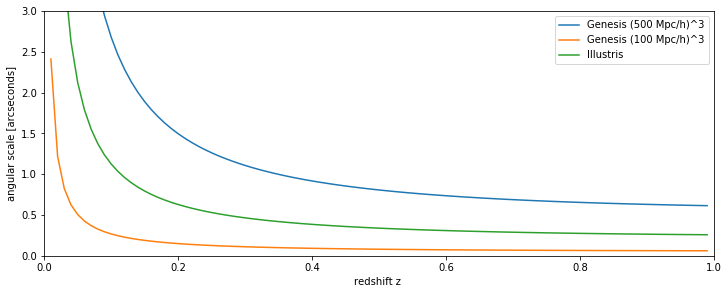

In [4]:
max_redshift = 1.
redshifts = np.arange(0,max_redshift,.01) 
angular_pcs = cosmo.kpc_proper_per_arcmin(redshifts).to(u.parsec / u.arcsec)

"""Manodeep:  The baryonic softening for Illustris is 0.7 kpc, and 
typically lengths >~ 3*softening are okay. The hydro cell resolution 
is 48 pc (relevant for metals/fluid properties);"""
sims = [(5000 * u.parsec,'Genesis (500 Mpc/h)^3'),
       (500 * u.parsec,'Genesis (100 Mpc/h)^3'),
       (700*3* u.parsec, 'Illustris')]

for pc_resolution, label in sims:
    angular_size = pc_resolution / angular_pcs
    plt.plot(redshifts, angular_size, label=label)

plt.xlabel('redshift z ')
plt.ylabel('angular scale [arcseconds]')
plt.legend(loc='upper right')
plt.ylim(0,3)
plt.xlim(0,max_redshift)
plt.gcf().set_size_inches(12, 4.5)

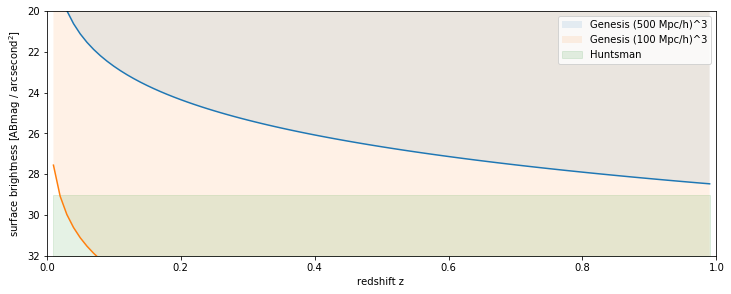

In [5]:
max_redshift = 1.
redshifts = np.arange(0.01,max_redshift,.01) 
mMs = cosmo.distmod(np.array(redshifts))

sims = [(1e9,'Genesis (500 Mpc/h)^3'),
       (1e5,'Genesis (100 Mpc/h)^3')]

for mass_resolution, label in sims:
    light_resolution = mass_resolution / m2l
    absolute_ABmag = -2.5*np.log10(light_resolution) * u.ABmag + M_sun * u.ABmag 
    apparent_ABmags = absolute_ABmag + mMs
    sb_ABmag = apparent_ABmags +2.5*np.log10(1) * u.ABmag
    plt.plot(redshifts, sb_ABmag)
    plt.fill_between(redshifts, sb_ABmag, 10, alpha=.1, label=label)


#plt.fill_between(masses,15,29,color='grey',alpha=.1)
plt.fill_between(redshifts,29,32,color='green',alpha=.1, label='Huntsman')

plt.xlabel('redshift z ')
plt.ylabel('surface brightness [ABmag / arcsecond$^2$]')
plt.legend()
plt.ylim(32,20)
plt.xlim(0,max_redshift)
plt.gcf().set_size_inches(12, 4.5)